# Define Problem Statement and perform Exploratory Data Analysis:
## 1. Definition of problem:
**Context**

Apollo Hospitals was established in 1983, renowned as the architect of modern healthcare in India. As the nation's first corporate hospital, Apollo Hospitals is acclaimed for pioneering the private healthcare revolution in the country.


As a data scientist working at Apollo 24/7, the ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.

You can help Apollo hospitals to be more efficient, to influence diagnostic and treatment processes, to map the spread of a pandemic.


One of the best examples of data scientists making a meaningful difference at a global level is in the response to the COVID-19 pandemic, where they have improved information collection, provided ongoing and accurate estimates of infection spread and health system demand, and assessed the effectiveness of government policies.

**The company wants to know:**

• Which variables are significant in predicting the reason for hospitalization for different regions

• How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

**Column Profiling:**

`Age:` This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).

`Sex:` This is the policy holder's gender, either male or female
Viral Load: Viral load refers to the amount of virus in an infected person's blood

`Severity Level:` This is an integer indicating how severe the patient is

`Smoker:` This is yes or no depending on whether the insured regularly smokes tobacco.

`Region:` This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest
Hospitalization charges: Individual medical costs billed to health insurance

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import figure
from scipy import stats
from scipy.stats import ttest_ind, ttest_ind_from_stats, f_oneway, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [190]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv", index_col=0)
df.head()

,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,19,female,yes,southwest,9.30,0,42212
1,18,male,no,southeast,11.26,1,4314
2,28,male,no,southeast,11.00,3,11124
3,33,male,no,northwest,7.57,0,54961
4,32,male,no,northwest,9.63,0,9667


In [191]:
df.shape

(1338, 7)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 83.6+ KB


- There are no missing values present in the data.

In [193]:
# View the statistical summary of the dataset
df.describe()

,age,viral load,severity level,hospitalization charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,10.221233,1.094918,33176.058296
std,14.049960,2.032796,1.205493,30275.029296
min,18.000000,5.320000,0.000000,2805.000000
25%,27.000000,8.762500,0.000000,11851.000000
50%,39.000000,10.130000,1.000000,23455.000000
75%,51.000000,11.567500,2.000000,41599.500000
max,64.000000,17.710000,5.000000,159426.000000


In [194]:
df.describe(include="object")

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [195]:
df.corr()

,age,viral load,severity level,hospitalization charges
age,1.000000,0.109300,0.042469,0.299008
viral load,0.109300,1.000000,0.012729,0.198388
severity level,0.042469,0.012729,1.000000,0.067998
hospitalization charges,0.299008,0.198388,0.067998,1.000000


In [196]:
# check for duplicates
print("Number of duplicates: {}".format(df.duplicated().sum()))

Number of duplicates: 1


In [197]:
# check number of unique values in each column
for col in df.columns:
    print("{:15}: {}".format(col, df[col].nunique()))

age            : 47
sex            : 2
smoker         : 2
region         : 4
viral load     : 462
severity level : 6
hospitalization charges: 1320


In [198]:
# change datatype of severity_level to object
df['severity level'] = df['severity level'].astype('object')

In [199]:
cat_cols = ['sex', 'smoker', 'region', 'severity level']
num_cols = ['age', 'viral load']
target = "hospitalization charges"

## Univariate Analysis

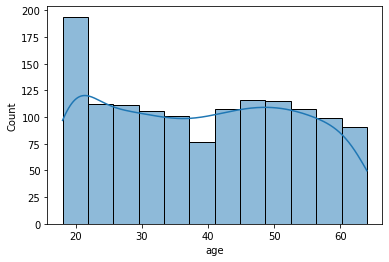

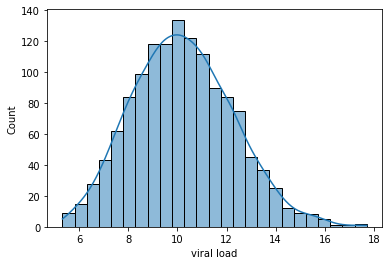

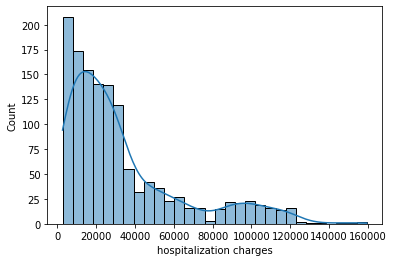

In [200]:
# Univariate distributions for all continuous variables
for col in num_cols:
    sns.histplot(df[col], kde=True)
    plt.show()
    
sns.histplot(df[target], kde=True)
plt.show()


- **age:** Follows somewhat uniform distribution
- **viral load:** Looks like the normal distribution 
- **hospitalization charges:** is right skewed

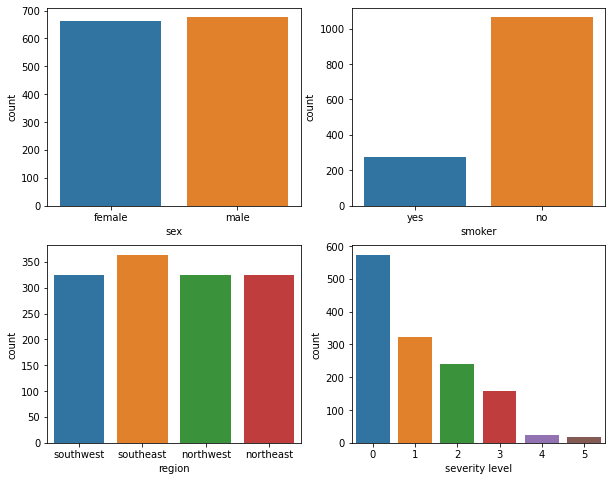

In [201]:
# Count plot for all categorical variables
nrows=2
ncols=2
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 8))

index=0
for i in range(nrows):
    for j in range(ncols):
        sns.countplot(x=cat_cols[index], data=df, ax=axs[i,j])
        index += 1

- `sex & ragion` have almost equal number of values in each category.
- Most of the patients are `non-smoker`.
- Number of patients decreases as severity level increases.

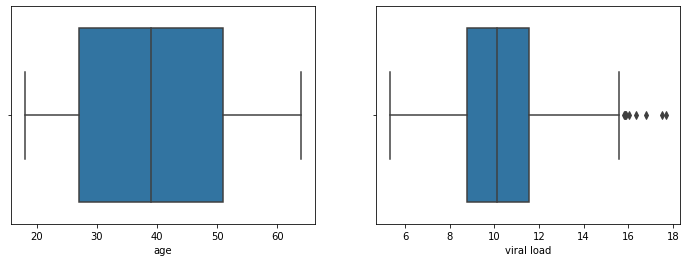

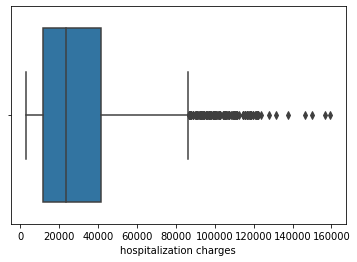

In [202]:
# outliers detection using box plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=df, ax=axs[i])

plt.show()    
sns.boxplot(x=target, data=df)
plt.show()

- `age` doesn't have any outliers
- `viral load` and `hospitalization charges` have outliers.

## Bivariate Analysis

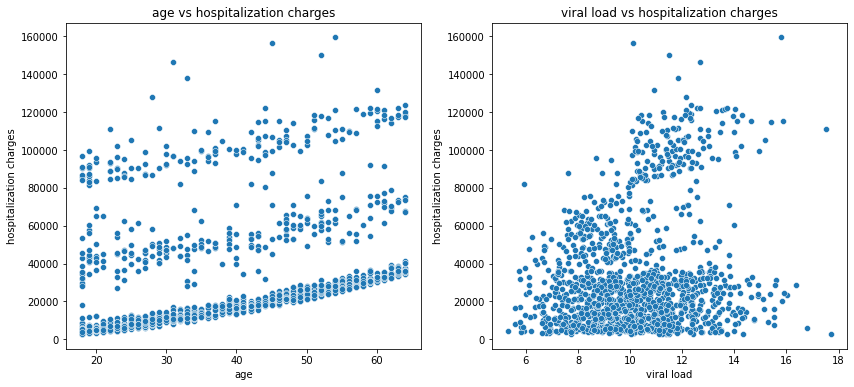

In [203]:
# Bivariate distributions between continuous variables
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
index = 0
for i in range(2):
    sns.scatterplot(y=target, x=num_cols[index], data=df, ax=axs[i])
    axs[i].set_title("{} vs hospitalization charges".format(num_cols[index]))
    index += 1 
plt.show()

- There seems to be a slight correlation between `hospitalization charges` (in different ranges) and `age`
- There seems to be no correlation between `hospitalization charges` and `viral load`

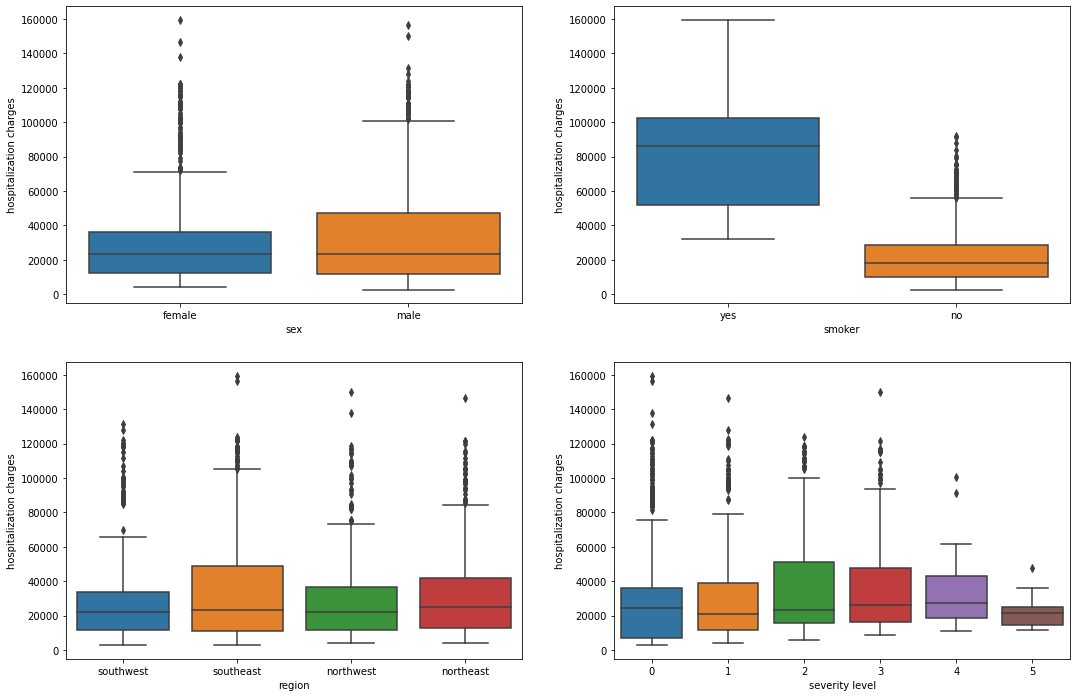

In [204]:
# Count plot between categorical variables
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
index = 0
for i in range(2):
    for j in range(2):
        sns.boxplot(y=target, x=cat_cols[index], data=df, ax=axs[i, j])
        index += 1 
plt.show()

- It is quite evident from the charts that `smoker patients` will have high `hospitalization charges.`
- After comparing the medians for `sex`, seems like both genders have similar `hospitalization charges.` (Will validation using `hypothesis testing`)
- Patients living in `southeast` and `northeast`, have slightly higher `hospitalization charges` as compared to `southwest` and `northwest` respectively.
- As `severity level` increases, `hospitalization charges` also increases.

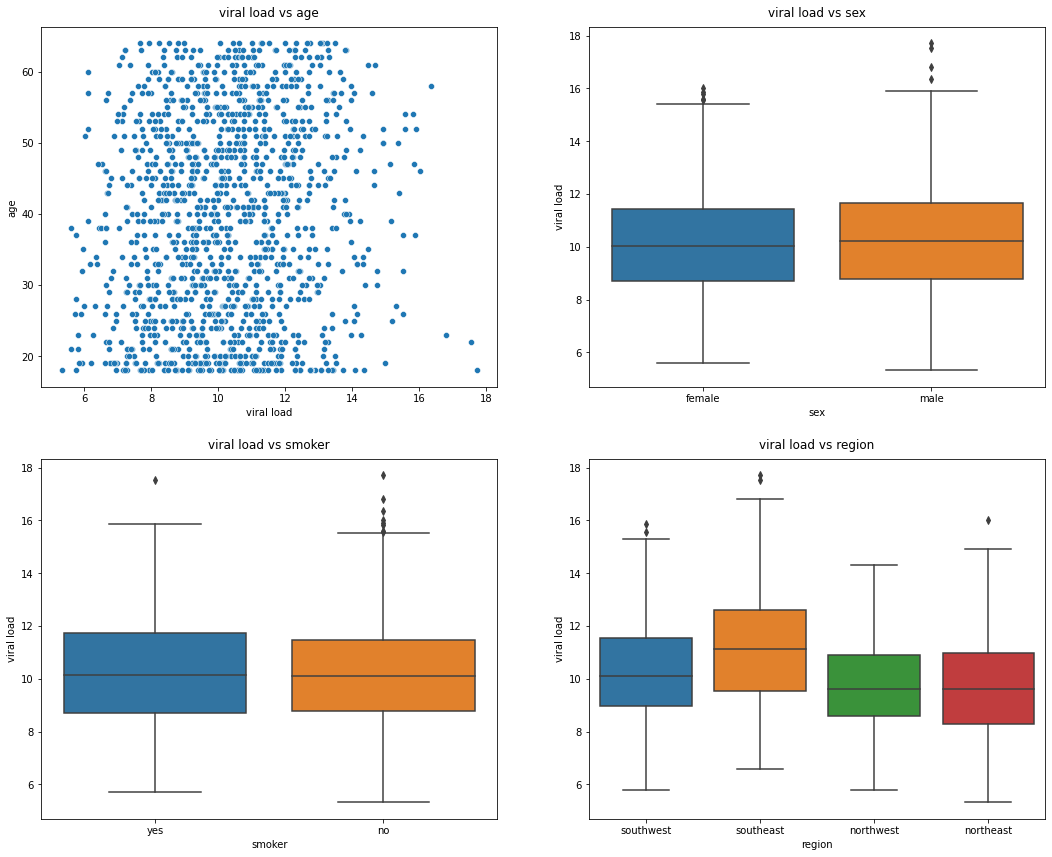

In [205]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))
plt.subplots_adjust(top=1.5)

sns.scatterplot(x='viral load', y='age', data=df, ax=axs[0,0])
sns.boxplot(y='viral load', x='sex', data=df, ax=axs[0,1])
sns.boxplot(y='viral load', x='smoker', data=df, ax=axs[1,0])
sns.boxplot(y='viral load', x='region', data=df, ax=axs[1,1])

axs[0,0].set_title("viral load vs age", pad=10)
axs[0,1].set_title("viral load vs sex", pad=10)
axs[1,0].set_title("viral load vs smoker", pad=10)
axs[1,1].set_title("viral load vs region", pad=10)
plt.show()

- Seems like `viral load` is not related to features `age`, `sex` and `smoker`
- Patients from `southwest` have higher `viral load` as compared to other regions.

## Mutlivariate Analysis

In [206]:
df1 = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/681/original/scaler_apollo_hospitals.csv")
df1.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [207]:
corr = df1.drop(columns=['Unnamed: 0']).corr()
corr

,age,viral load,severity level,hospitalization charges
age,1.000000,0.109300,0.042469,0.299008
viral load,0.109300,1.000000,0.012729,0.198388
severity level,0.042469,0.012729,1.000000,0.067998
hospitalization charges,0.299008,0.198388,0.067998,1.000000


In [208]:
df.corr()

,age,viral load,hospitalization charges
age,1.000000,0.109300,0.299008
viral load,0.109300,1.000000,0.198388
hospitalization charges,0.299008,0.198388,1.000000


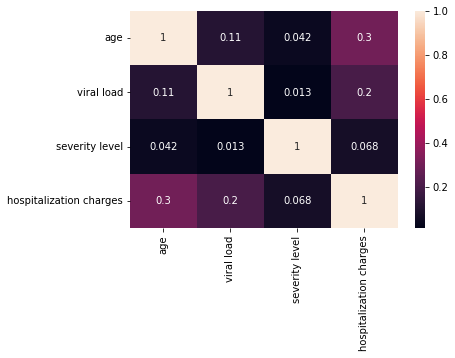

In [209]:
sns.heatmap(corr, annot=True)
plt.show()

In [210]:
df.columns

Index(['age', 'sex', 'smoker', 'region', 'viral load', 'severity level',
       'hospitalization charges'],
      dtype='object')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   object 
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 115.9+ KB


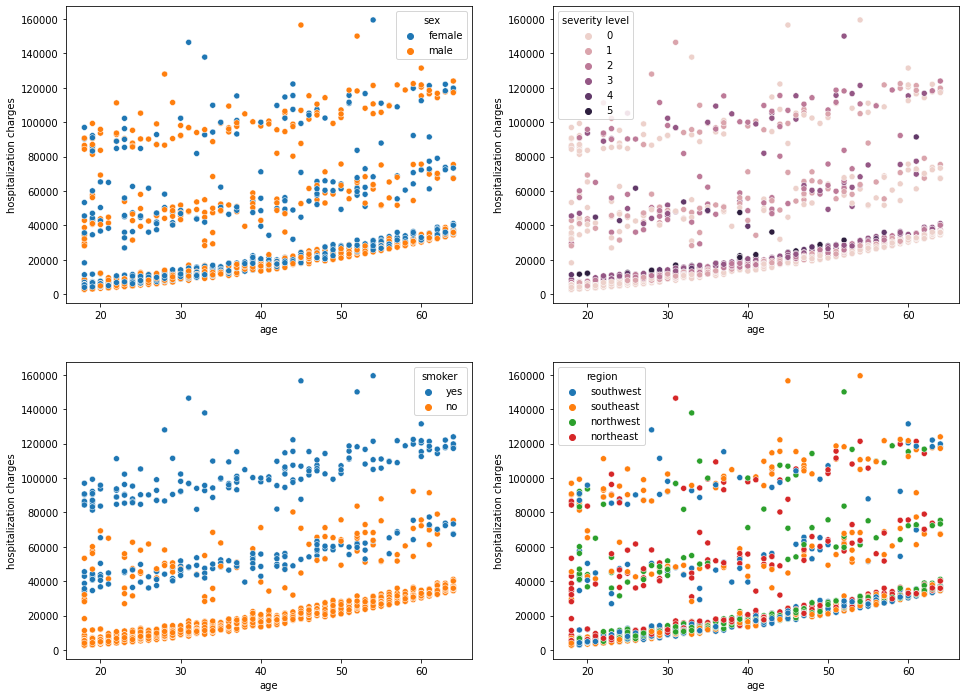

In [212]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

sns.scatterplot(y=target, x='age', data=df, hue='sex', ax=axs[0, 0])
sns.scatterplot(y=target, x='age', data=df, hue='severity level', ax=axs[0,1])
sns.scatterplot(y=target, x='age', data=df, hue='smoker', ax=axs[1,0])
sns.scatterplot(y=target, x='age', data=df, hue='region', ax=axs[1,1])
plt.show()

- There is no any specific patterns, only distinguishes clearly that smoker patients have high `hospitalization charges.`

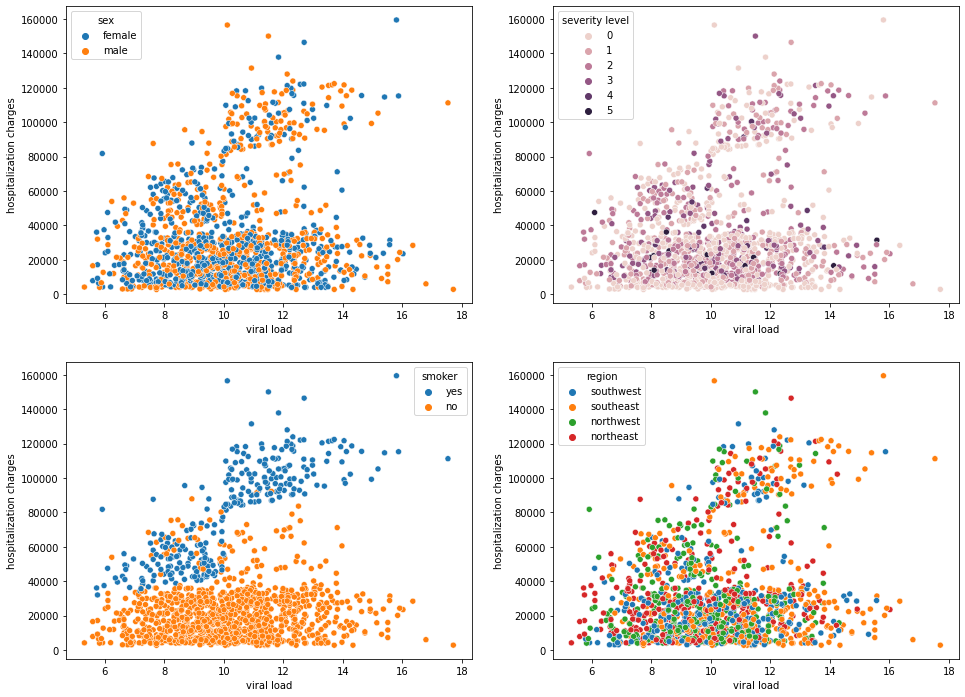

In [213]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

sns.scatterplot(y=target, x='viral load', data=df, hue='sex', ax=axs[0, 0])
sns.scatterplot(y=target, x='viral load', data=df, hue='severity level', ax=axs[0,1])
sns.scatterplot(y=target, x='viral load', data=df, hue='smoker', ax=axs[1,0])
sns.scatterplot(y=target, x='viral load', data=df, hue='region', ax=axs[1,1])
plt.show()

- There is no any specific patterns, only distinguishes clearly that smoker patients have high `hospitalization charges.`

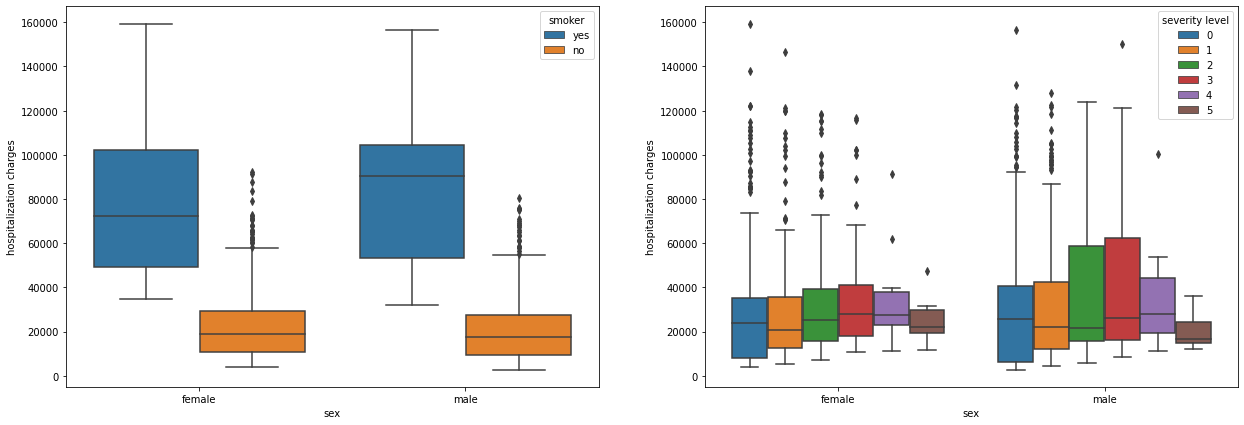

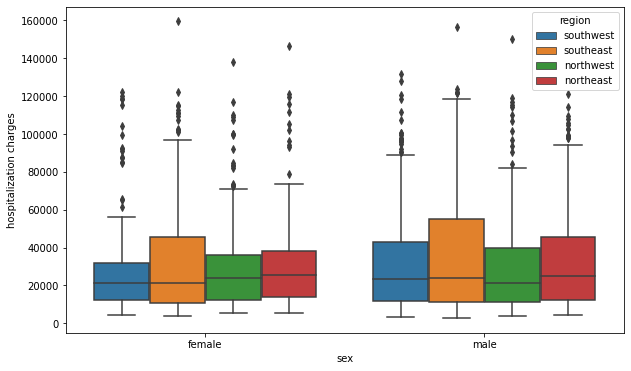

In [214]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))

sns.boxplot(y=target, x='sex', hue='smoker', data=df, ax=axs[0])
sns.boxplot(y=target, x='sex', hue='severity level', data=df, ax=axs[1])
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(y=target, x='sex', hue='region', data=df)
plt.show()

- `Male smoker patients` have `high hospitalization charges` as compared to `Female smoker patients`.
- `female with severity level 2 & 3` have high `hospitalization charges` while `male with severity level 1 & 4` have almost similar `hospitalization charges`.

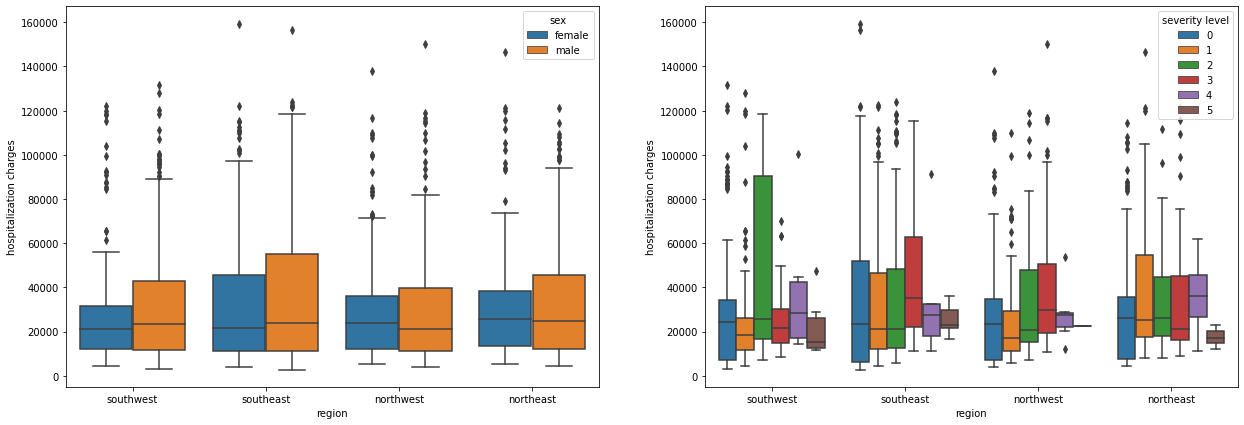

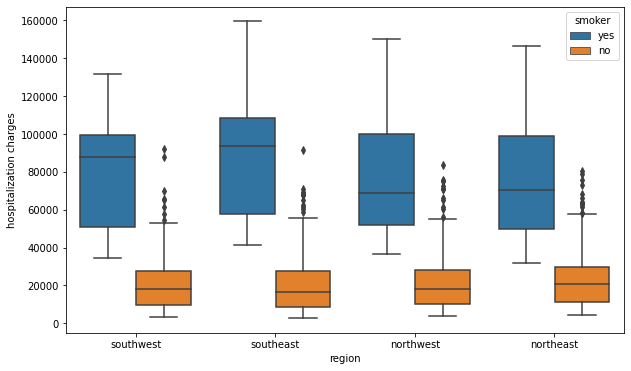

In [215]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))

sns.boxplot(y=target, x='region', hue='sex', data=df, ax=axs[0])
sns.boxplot(y=target, x='region', hue='severity level', data=df, ax=axs[1])
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(y=target, x='region', hue='smoker', data=df)
plt.show()

- `male patients in southwest & southeast` regions have slightly higher `hospitalization charges` as compare females while `female patients in northwest & northeast` have slightly higher `hospitalization charges` as compared to male patients.
- `smoker patients living in southwest & southeast` regions have high `hospitalization charges` as compared to `smoker patients living in north` regions.
- Patients living in `southwest` and have `severity level-2` have higher`hospitalization charges` as compared to other severity level patients
- Patients living in `southeast` have `severity level-3` have higher`hospitalization charges` as compared to other severity level patients
- Patients living in `northwest` have `severity level-2,3` have higher and almost similar `hospitalization charges` as compared to other severity level patients
- Patients living in `northeast` have `severity level-1` have higher `hospitalization charges` and `severity level-2,3,4` have almost similar `hospitalization charges`

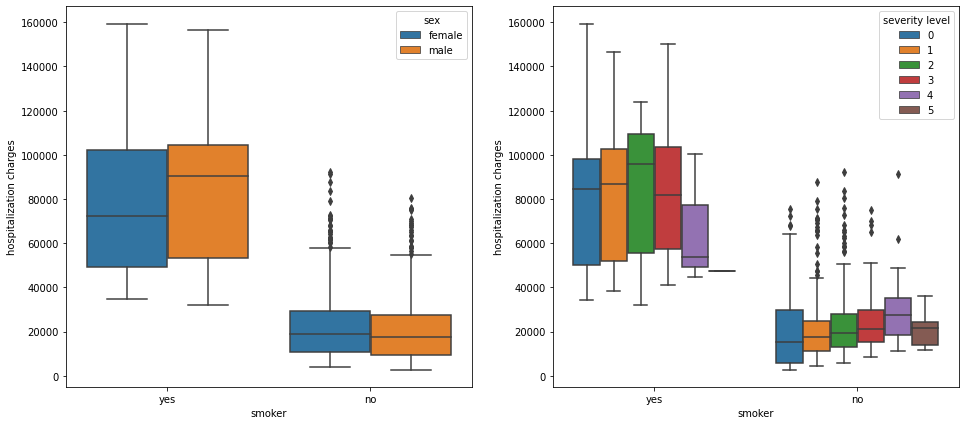

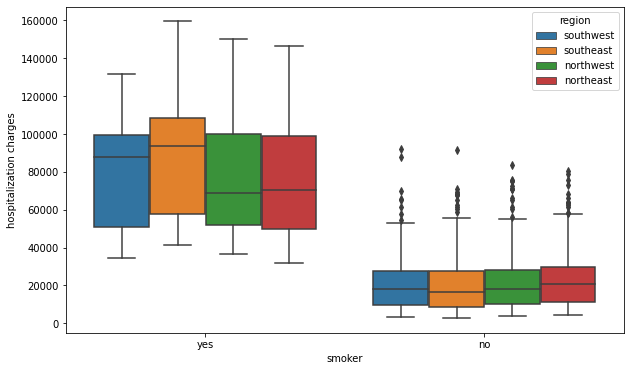

In [216]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

sns.boxplot(y=target, x='smoker', hue='sex', data=df, ax=axs[0])
sns.boxplot(y=target, x='smoker', hue='severity level', data=df, ax=axs[1])
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(y=target, x='smoker', hue='region', data=df)
plt.show()

- In `smoker patients`, patients with `severity level - 2` have higher `hospitalization charges` as compared to other severity levels.
- In `non-smoker patients`, patients with `severity level - 4` have higher `hospitalization charges` as compared to other severity levels.
- In `smoker patients`, patients living in `southeast` region have higher`hospitalization charges` as compared to other regions.

## Outliers Detection & Treatment:

In [217]:
df.isna().sum()

age                        0
sex                        0
smoker                     0
region                     0
viral load                 0
severity level             0
hospitalization charges    0
dtype: int64

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   object 
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 115.9+ KB


In [219]:
def detect_outliers(data):
    length_before = len(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0
    
    length_after = len(data[(data>lowerbound)&(data<upperbound)])
    return f"{np.round((length_before-length_after)/length_before,4)} % Outliers from input data found"

In [220]:
for col in ["age", "viral load","severity level","hospitalization charges"]:
  print(col,"has : ",detect_outliers(df[col]))

age has :  0.0 % Outliers from input data found
viral load has :  0.0067 % Outliers from input data found
severity level has :  0.4425 % Outliers from input data found
hospitalization charges has :  0.1039 % Outliers from input data found


- outlier presence is not significant. 
- all the columns have outliers less than 5%. 

In [221]:
df.shape

(1338, 7)

In [222]:
newdf = df.copy()

## Hypothesis Testing

#### Prove (or disprove) that the hospitalization of people who do smoking is greater than those who don't? (T-test Right tailed)

1. **Null Hypothesis (H0):** The hospitalization charges of people who smoke and those who do not smoke are equal or the hospitalization charges of people who do not smoke are greater.

2. **Alternate Hypothesis (H1):** The hospitalization charges of people who smoke are greater than those who do not smoke.

3. **Significance Level:** 0.05

Here we will be using right tailed 2-sample T-test.

In [223]:
smoker = newdf[newdf['smoker']=='yes']['hospitalization charges']
non_smoker = newdf[newdf['smoker']=='no']['hospitalization charges']

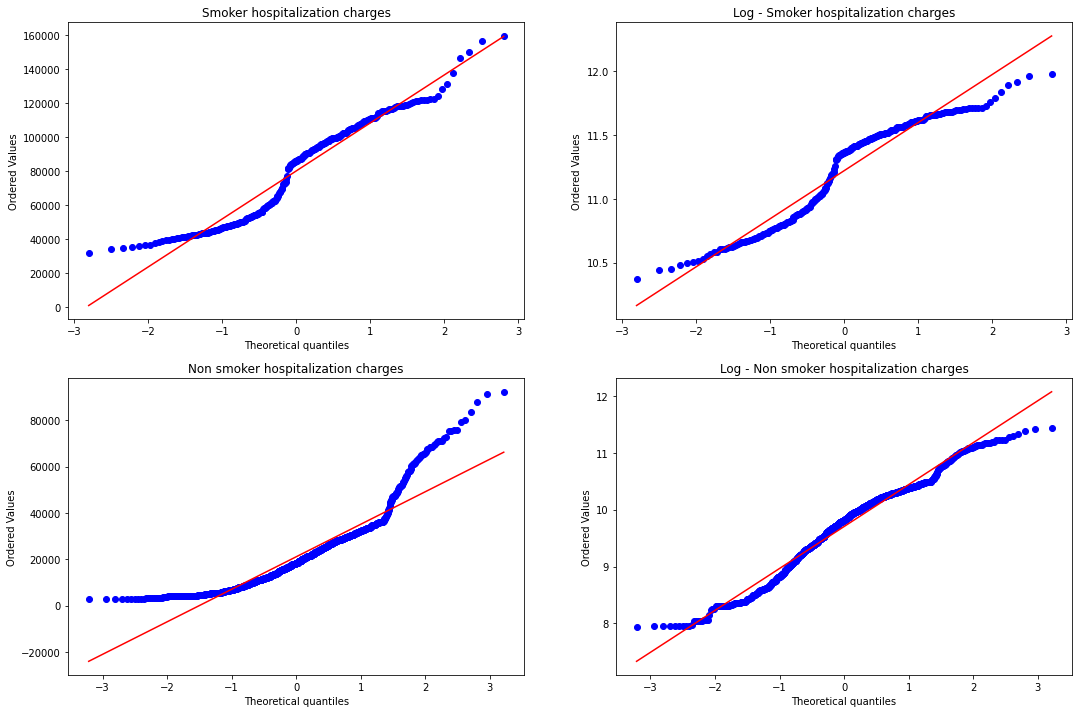

In [224]:
# normality check before and after log transformations
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

stats.probplot(smoker, plot=axs[0,0])
stats.probplot(np.log(smoker), plot=axs[0,1])
stats.probplot(non_smoker, plot=axs[1,0])
stats.probplot(np.log(non_smoker), plot=axs[1,1])

axs[0,0].set_title("Smoker hospitalization charges")
axs[0,1].set_title("Log - Smoker hospitalization charges")
axs[1,0].set_title("Non smoker hospitalization charges")
axs[1,1].set_title("Log - Non smoker hospitalization charges")
plt.show()

- After taking the log, values looks much closer to normal distribution, so we will do the test on the log-transformed values.

In [225]:
t_stat, p_val = stats.ttest_ind(np.log(smoker), np.log(non_smoker), alternative='greater')
print(t_stat, p_val)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_val < alpha:
    print("Reject the null hypothesis. The hospitalization charges of people who smoke are greater than those who do not smoke.")
else:
    print("Fail to reject the null hypothesis. There is no statistical evidence that the hospitalization charges of people who smoke are greater than those who do not smoke.")

32.590264455945366 3.152579721099768e-172
Reject the null hypothesis. The hospitalization charges of people who smoke are greater than those who do not smoke.


- Since p-value is less than 0.05, we reject the null hypothesis. 

- The hospitalization charges of people who smoke are greater than those who do not smoke.

#### Prove (or disprove) with statistical evidence that the viral load of females is different from that of males (T-test Two tailed)

1. **Null Hypothesis (H0):** The mean viral load of females is equal to the mean viral load of males.

2. **Alternate Hypothesis (H1):** The mean viral load of females is different from the mean viral load of males.

3. **Significance Level:** 0.05

Here we will be using two tailed 2-sample T-test.

In [226]:
male_vl = newdf[newdf['sex']=='male']['viral load']
female_vl = newdf[newdf['sex']=='female']['viral load']

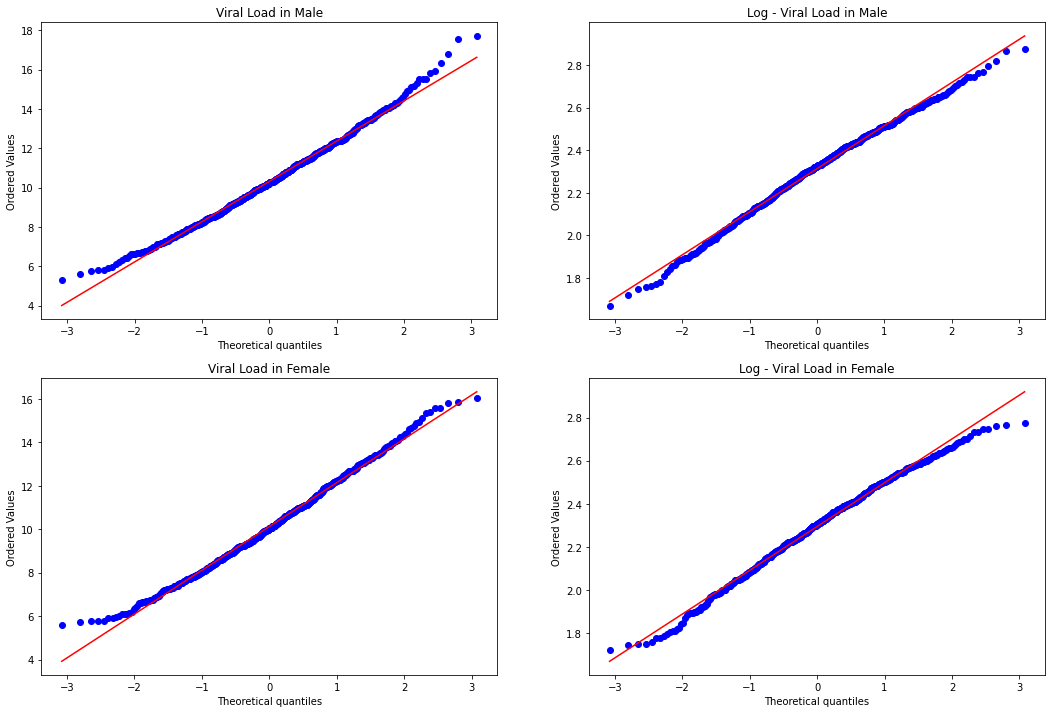

In [227]:
# normality check before and after log transformations
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

stats.probplot(male_vl, plot=axs[0,0])
stats.probplot(np.log(male_vl), plot=axs[0,1])
stats.probplot(female_vl, plot=axs[1,0])
stats.probplot(np.log(female_vl), plot=axs[1,1])

axs[0,0].set_title("Viral Load in Male")
axs[0,1].set_title("Log - Viral Load in Male")
axs[1,0].set_title("Viral Load in Female")
axs[1,1].set_title("Log - Viral Load in Female")
plt.show()

- After taking the log, values looks much closer to normal distribution, so we will do the test on the log-transformed values.

In [228]:
t_stat, p_val = stats.ttest_ind(np.log(male_vl), np.log(female_vl), alternative='two-sided')
print(t_stat, p_val)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_val < alpha:
    print("Reject the null hypothesis. The mean viral load of females is different from that of males.")
else:
    print("Fail to reject the null hypothesis. There is no statistical evidence that the mean viral load of females is different from that of males.")

1.6847027463929845 0.09227949561258407
Fail to reject the null hypothesis. There is no statistical evidence that the mean viral load of females is different from that of males.


- Since p-value is greater than 0.05, Fail to reject the null hypothesis

- There is no statistical evidence that the mean viral load of females is different from that of males.

#### Is the proportion of smoking significantly different across different regions? (Chi-square)

1. **Null Hypothesis (H0):** The hospitalization charges of people who smoke and those who do not smoke are equal or the hospitalization charges of people who do not smoke are greater.

2. **Alternate Hypothesis (H1):** The hospitalization charges of people who smoke are greater than those who do not smoke.

3. **Significance Level:** 0.05

Here we will be using (Chi-square).

In [229]:
data_table = pd.crosstab(df['smoker'], df['region'])
print("Oberved values:")
data_table

Oberved values:


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [230]:
val = stats.chi2_contingency(data_table)
expected_values = val[3]
expected_values

array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
       [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]])

In [231]:
# Perform a chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(data_table)
print("chi2_stat:", chi2_stat)
print("p_val    :", p_val)
print("dof      :", dof)
print("expected :", expected)
# Set the significance level (alpha)
alpha = 0.05
print("\n")
# Check if the p-value is less than alpha
if p_val < alpha:
    print("Reject the null hypothesis. The proportion of smoking is significantly different across different regions.")
else:
    print("Fail to reject the null hypothesis. There is no statistical evidence that the proportion of smoking is significantly different across different regions.")

chi2_stat: 7.34347776140707
p_val    : 0.06171954839170547
dof      : 3
expected : [[257.65022422 258.44544096 289.45889387 258.44544096]
 [ 66.34977578  66.55455904  74.54110613  66.55455904]]


Fail to reject the null hypothesis. There is no statistical evidence that the proportion of smoking is significantly different across different regions.


- Since p-value is greater than 0.05, Fail to reject the null hypothesis. 

- There is no statistical evidence that the proportion of smoking is significantly different across different regions.

#### Is the proportion of smoking significantly different across different regions? (Chi-square)

1. **Null Hypothesis (H0):** The mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level are equal.

2. **Alternate Hypothesis (H1):** The mean viral load of women with 0 Severity level, 1 Severity level, and 2 Severity level are not equal.

3. **Significance Level:** 0.05

Here we will be using (One way Anova).

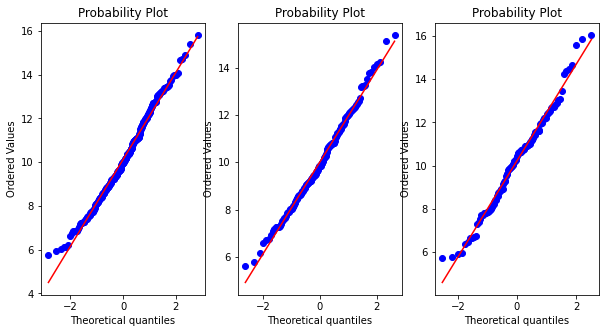

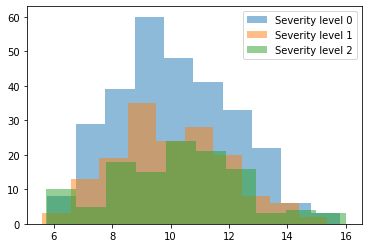



Fail to reject the equal variance assumption. The variances of the three groups are equal.


In [232]:
# Create separate dataframes for each severity level
severity_0 = df[(df['severity level'] == 0) & (df['sex'] == 'female')]
severity_1 = df[(df['severity level'] == 1) & (df['sex'] == 'female')]
severity_2 = df[(df['severity level'] == 2) & (df['sex'] == 'female')]

# Check the normality assumption using a Q-Q plot and a histogram
fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].set_title('Severity Level 0')
stats.probplot(severity_0['viral load'], plot=axes[0])
axes[1].set_title('Severity Level 1')
stats.probplot(severity_1['viral load'], plot=axes[1])
axes[2].set_title('Severity Level 2')
stats.probplot(severity_2['viral load'], plot=axes[2])
plt.show()

plt.hist(severity_0['viral load'], alpha=0.5, label='Severity level 0')
plt.hist(severity_1['viral load'], alpha=0.5, label='Severity level 1')
plt.hist(severity_2['viral load'], alpha=0.5, label='Severity level 2')
plt.legend(loc='upper right')
plt.show()

# Check the equal variance assumption using Levene's test
levene_stat, levene_pval = stats.levene(severity_0['viral load'], severity_1['viral load'], severity_2['viral load'])
print("\n")
# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if levene_pval < alpha:
    print("Reject the equal variance assumption. The variances of the three groups are not equal.")
else:
    print("Fail to reject the equal variance assumption. The variances of the three groups are equal.")


In [233]:
# Create separate dataframes for each severity level
severity_0 = df[(df['severity level'] == 0) & (df['sex'] == 'female')]
severity_1 = df[(df['severity level'] == 1) & (df['sex'] == 'female')]
severity_2 = df[(df['severity level'] == 2) & (df['sex'] == 'female')]

# Perform a one-way ANOVA test assuming equal variances
f_stat, p_val = stats.f_oneway(severity_0['viral load'], severity_1['viral load'], severity_2['viral load'])

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha
if p_val < alpha:
    print("Reject the null hypothesis. The mean viral load of women with different severity levels are not the same.")
else:
    print("Fail to reject the null hypothesis. There is no statistical evidence that the mean viral load of women with different severity levels are not the same.")


Fail to reject the null hypothesis. There is no statistical evidence that the mean viral load of women with different severity levels are not the same.


- Since p-value is greater than 0.05, Fail to reject the null hypothesis. 

- There is no statistical evidence that the mean viral load of women with different severity levels are not the same.

## Business Insights:

- The mean hospitalization charges are highest for patients with a severity level of 3, followed by those with a severity level of 2 and 1.

- The distribution of hospitalization charges is positively skewed, indicating that there are a few patients with very high hospitalization charges that are driving the mean and median upward.

- Hospitalization charges are significantly higher for smokers than for non-smokers.

- Hospitalization charges are significantly higher for patients with higher viral loads, indicating that viral load may be a contributing factor to hospitalization charges.

- Hospitalization charges are higher for patients from the southeast region than from other regions, indicating that regional factors may be affecting hospitalization charges.

- Age is positively correlated with hospitalization charges, indicating that older patients tend to have higher hospitalization charges.

- Female patients have significantly lower hospitalization charges than male patients, indicating a potential gender bias in healthcare.

- The mean viral load is higher for patients who smoke than for non-smokers, indicating a potential link between smoking and viral load.

- The southeast region has the highest proportion of smokers, indicating a potential target for smoking cessation programs.

## Recommendations:

- Develop targeted interventions to reduce the severity of patients' conditions and thereby reduce hospitalization charges.

- Investigate the reasons for the positively skewed distribution of hospitalization charges and develop targeted interventions to reduce the financial burden on patients with extremely high charges.

- Provide additional resources and support for patients with higher viral loads to reduce hospitalization charges and improve outcomes.

- Implement smoking cessation programs to help patients quit smoking and reduce hospitalization charges.

- Develop targeted interventions to reduce viral transmission and thereby reduce hospitalization charges associated with viral infections.

- Investigate the reasons for the higher hospitalization charges in the southeast region and develop targeted interventions to address these factors.

- Consider age as a factor when predicting hospitalization charges and adjust pricing accordingly for older patients.

- Address the gender bias in healthcare by ensuring that female patients receive equitable care and do not face discrimination in hospitalization charges.

- Develop targeted public health campaigns to educate patients on the risks of smoking and the potential impact on viral load and hospitalization charges.

- Implement smoking cessation programs and targeted public health campaigns in the southeast region to reduce the proportion of smokers and associated hospitalization charges.
